In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import datetime
from warnings import filterwarnings
filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix


In [2]:
df = pd.read_csv('air quality data.csv')
df1=df.dropna(subset=['AQI'],inplace=True)
df.isnull().sum().sort_values(ascending = False)

Xylene     15372
PM10        7086
NH3         6536
Toluene     5826
Benzene     3535
NOx         1857
O3           807
PM2.5        678
SO2          605
CO           445
NO2          391
NO           387
City           0
AQI            0
dtype: int64

In [3]:
null_value_percentage = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False)
null_value_percentage

Xylene     61.859155
PM10       28.515091
NH3        26.301811
Toluene    23.444668
Benzene    14.225352
NOx         7.472837
O3          3.247485
PM2.5       2.728370
SO2         2.434608
CO          1.790744
NO2         1.573441
NO          1.557344
City        0.000000
AQI         0.000000
dtype: float64

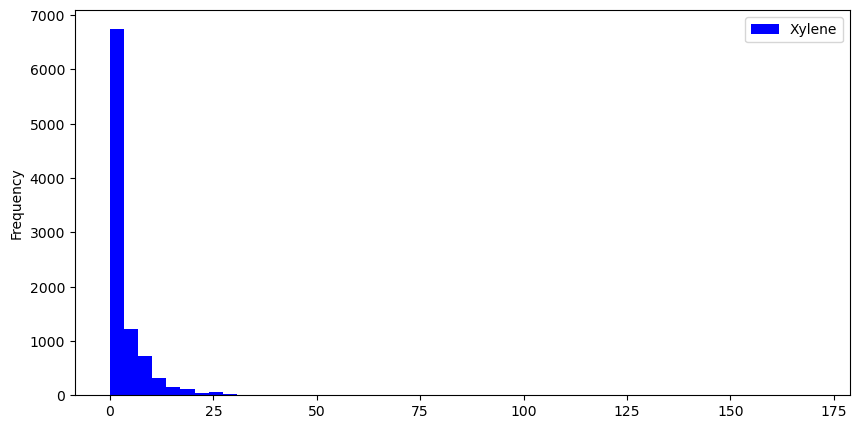

In [4]:
df['Xylene'].plot(kind='hist',bins=50,color='blue',figsize=(10,5))
plt.legend()
plt.show()

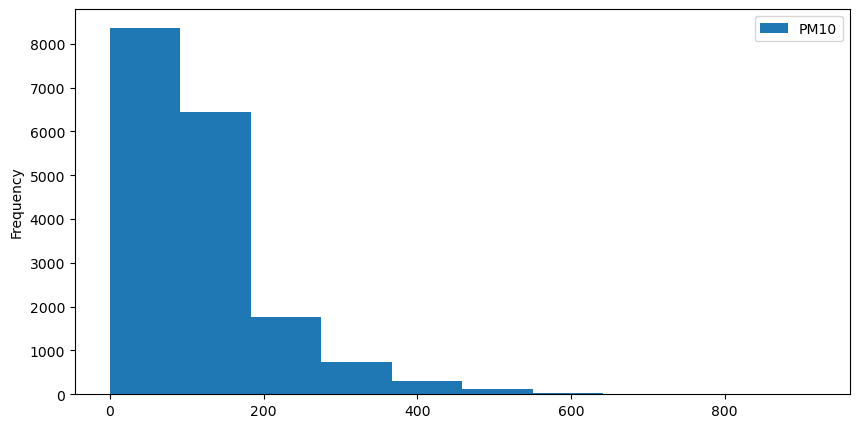

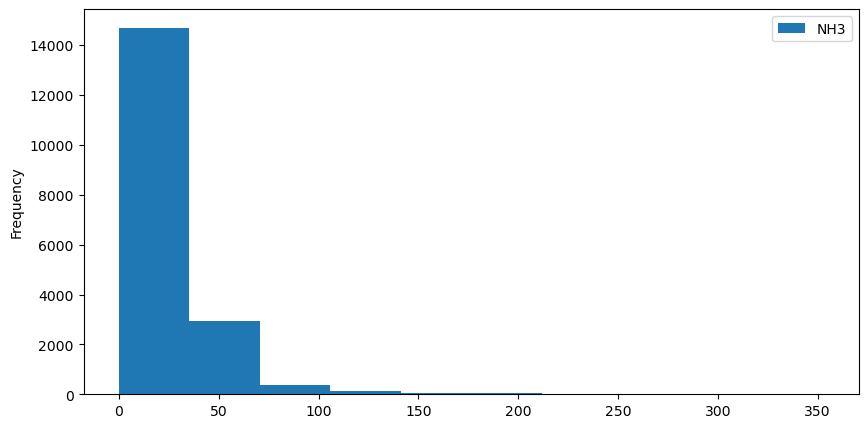

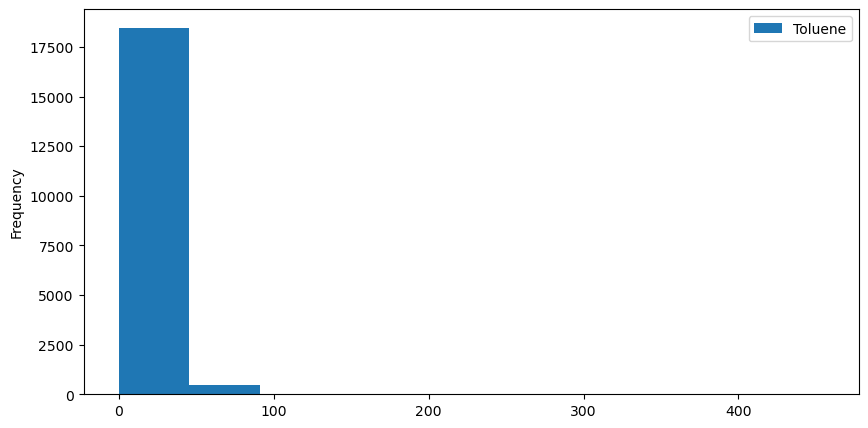

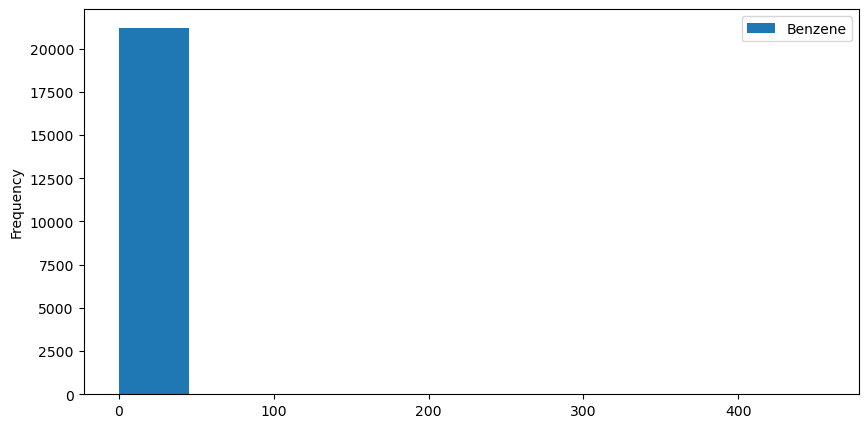

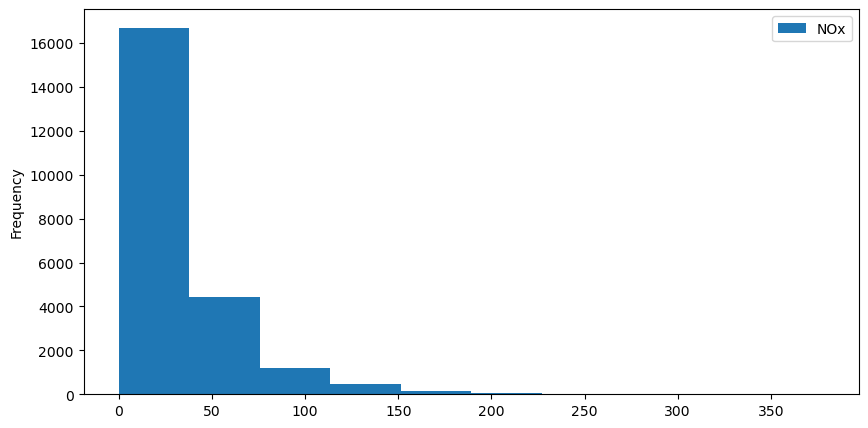

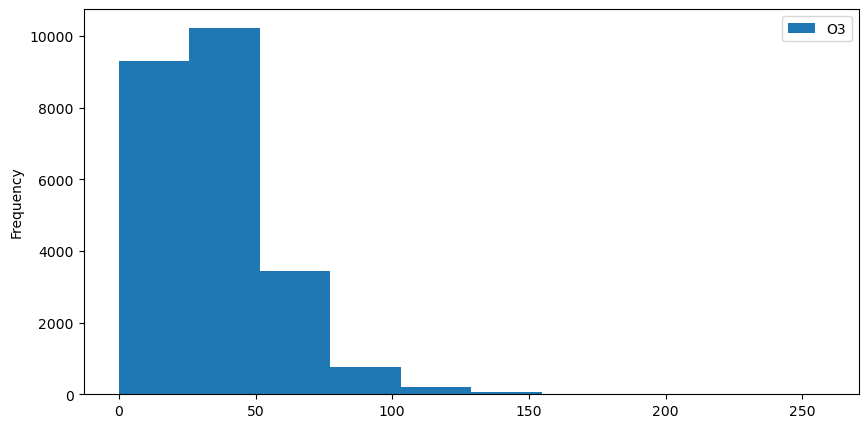

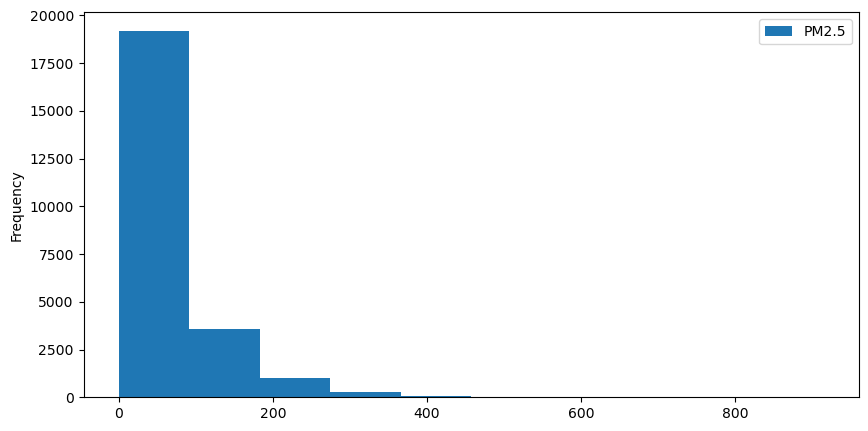

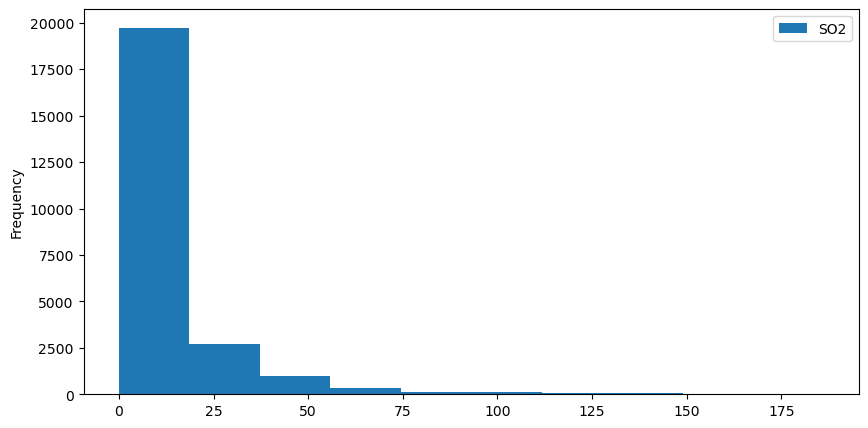

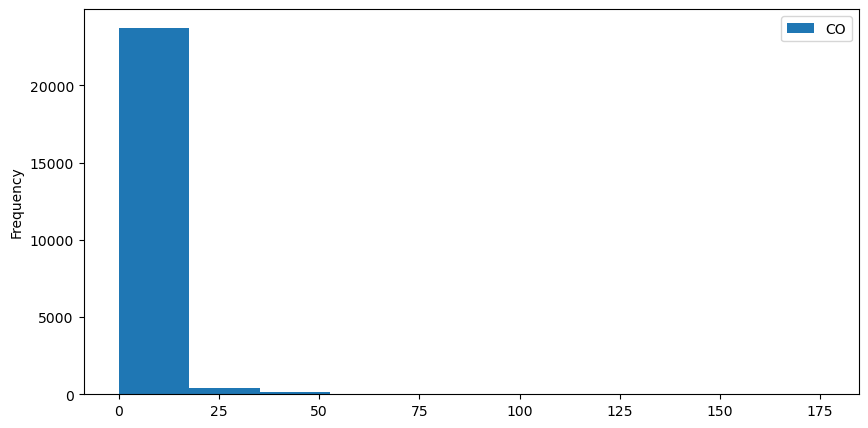

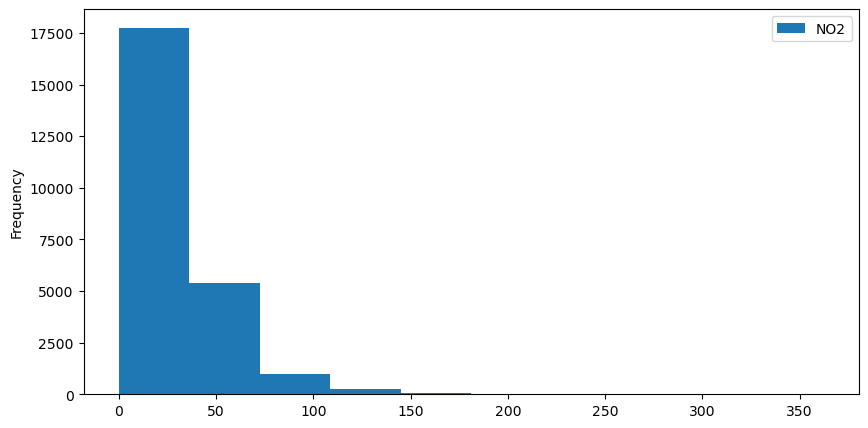

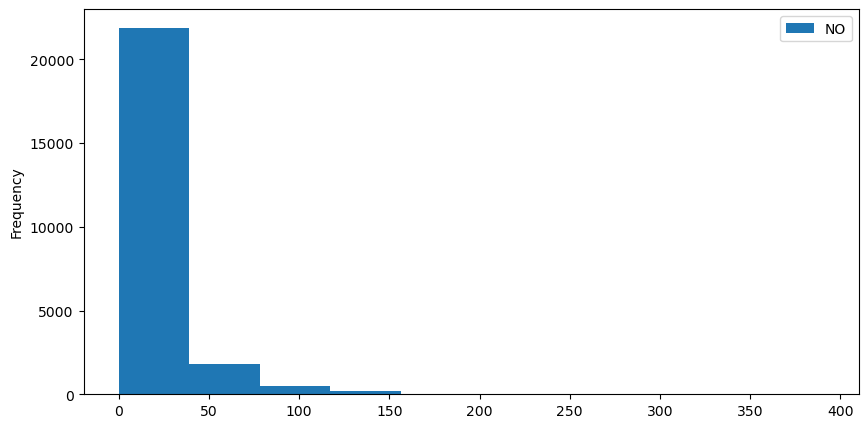

In [5]:
df['PM10'].plot(kind='hist',figsize=(10,5))
plt.legend()
plt.show()
df['NH3'].plot(kind='hist',figsize=(10,5))
plt.legend()
plt.show()
df['Toluene'].plot(kind='hist',figsize=(10,5))
plt.legend()
plt.show()
df['Benzene'].plot(kind='hist',figsize=(10,5))
plt.legend()
plt.show()
df['NOx'].plot(kind='hist',figsize=(10,5))
plt.legend()
plt.show()
df['O3'].plot(kind='hist',figsize=(10,5))
plt.legend()
plt.show()
df['PM2.5'].plot(kind='hist',figsize=(10,5))
plt.legend()
plt.show()
df['SO2'].plot(kind='hist',figsize=(10,5))
plt.legend()
plt.show()
df['CO'].plot(kind='hist',figsize=(10,5))
plt.legend()
plt.show()
df['NO2'].plot(kind='hist',figsize=(10,5))
plt.legend()
plt.show()
df['NO'].plot(kind='hist',figsize=(10,5))
plt.legend()
plt.show()

In [6]:
df = df.replace({

"PM2.5": {np.nan:67.476613},

"PM10" : {np.nan:118.454435},

"NO": {np.nan:17.622421},

"NO2": {np.nan:28.978391},

"NOx": {np.nan:32.289012},

"NH3": {np.nan:23.848366},

"CO": {np.nan:2.345267},

"S02": {np.nan:34.912885},

"03": {np.nan:38.320547},

"Benzene": {np.nan:3.458668},

"Toluene": {np.nan:9.525714},

"Xylene": {np.nan:3.588683}})

In [7]:
def replace_outliers_with_quartiles(df):
    """
    This function replaces outliers in numeric columns of a DataFrame with the respective
    first quartile (Q1) or third quartile (Q3) values.

    Parameters:
        df (pandas.DataFrame): The input DataFrame.

    Returns:
        pandas.DataFrame: The DataFrame with outliers replaced.
    """
    for column in df.select_dtypes(include=['number']).columns:
        # Calculate Q1, Q3, and IQR for the column
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1

        # Calculate lower and upper bounds
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Replace outliers with Q1 or Q3
        df[column] = df[column].apply(
            lambda x: Q1 if x < lower_bound else (Q3 if x > upper_bound else x)
        )
    return df

<Axes: >

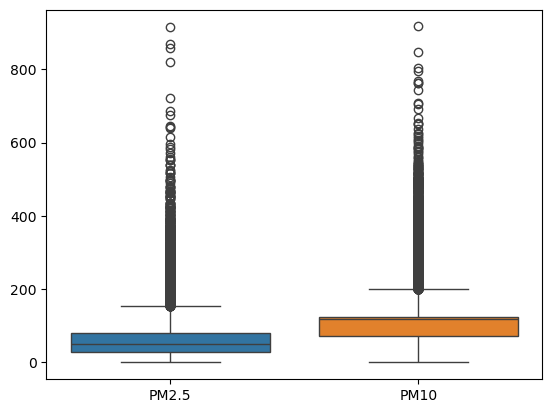

In [8]:
sns.boxplot(data = df[["PM2.5", "PM10"]])


<Axes: >

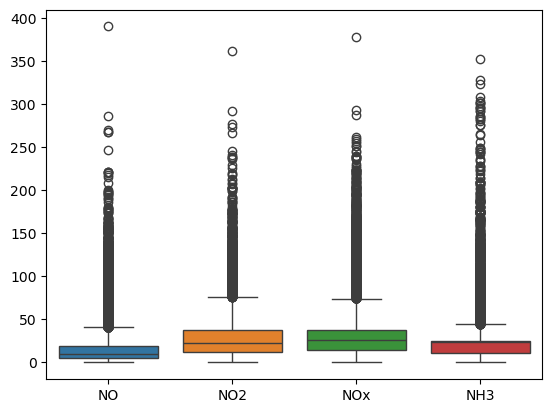

In [9]:
sns.boxplot(data = df[["NO","NO2","NOx","NH3"]])

<Axes: >

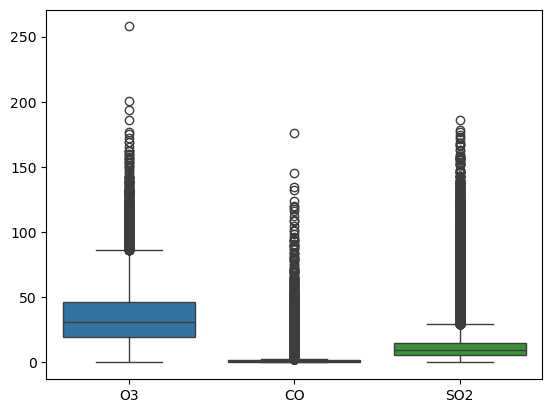

In [10]:
sns.boxplot(data = df[["O3","CO","SO2"]])

<Axes: >

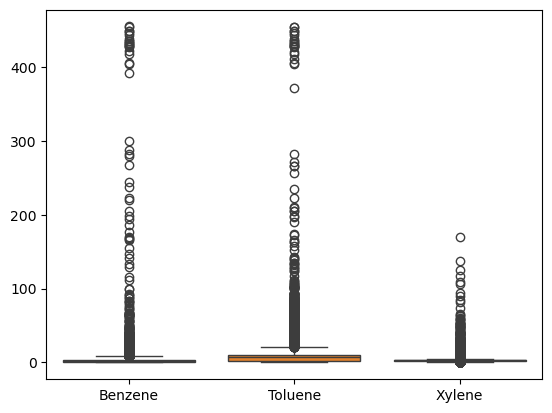

In [11]:
sns.boxplot(data = df[["Benzene","Toluene","Xylene"]])

In [12]:
df1 = df.drop(columns = ["City"], axis =1, inplace = True)

In [13]:
df.head()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
28,83.13,118.454435,6.93,28.71,33.72,23.848366,6.93,49.52,59.76,0.02,0.00,3.14,209.0
29,79.84,118.454435,13.85,28.68,41.08,23.848366,13.85,48.49,97.07,0.04,0.00,4.81,328.0
30,94.52,118.454435,24.39,32.66,52.61,23.848366,24.39,67.39,111.33,0.24,0.01,7.67,514.0
31,135.99,118.454435,43.48,42.08,84.57,23.848366,43.48,75.23,102.70,0.40,0.04,25.87,782.0
32,178.33,118.454435,54.56,35.31,72.80,23.848366,54.56,55.04,107.38,0.46,0.06,35.61,914.0


In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

In [16]:
x = df[["PM2.5", "PM10", "NO", "NO2", "NOx", "NH3", "CO", "SO2", "O3", "Benzene", "Toluene", "Xylene"]]
y = df["AQI"]

In [17]:
x.head()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene
28,83.13,118.454435,6.93,28.71,33.72,23.848366,6.93,49.52,59.76,0.02,0.00,3.14
29,79.84,118.454435,13.85,28.68,41.08,23.848366,13.85,48.49,97.07,0.04,0.00,4.81
30,94.52,118.454435,24.39,32.66,52.61,23.848366,24.39,67.39,111.33,0.24,0.01,7.67
31,135.99,118.454435,43.48,42.08,84.57,23.848366,43.48,75.23,102.70,0.40,0.04,25.87
32,178.33,118.454435,54.56,35.31,72.80,23.848366,54.56,55.04,107.38,0.46,0.06,35.61


In [18]:
y.head()

28    209.0
29    328.0
30    514.0
31    782.0
32    914.0
Name: AQI, dtype: float64

In [19]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.2, random_state = 70)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(19880, 12) (4970, 12) (19880,) (4970,)


In [23]:
model = LinearRegression()  # Define the model
model.fit(X_train, y_train)  # Train the model
train_pred = model.predict(X_train)  # Predict on training data
test_pred = model.predict(X_test)    # Predict on test data


NameError: name 'y_train' is not defined

In [20]:
print(df.columns)


Index(['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3',
       'Benzene', 'Toluene', 'Xylene', 'AQI'],
      dtype='object')
